In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Customer Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replace blanks with 0

In [5]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df["customerID"].duplicated().sum()

0

In [9]:
def conv(value):
    if value==1:
        return "Yes"
    else:
        return "No"

df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

#converted 0 and 1 value to seniorcitizen yes or no

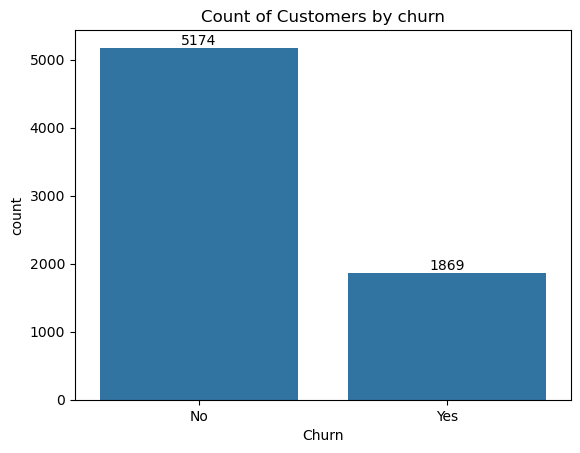

In [10]:
ax=sns.countplot(x='Churn',data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by churn")
plt.show()

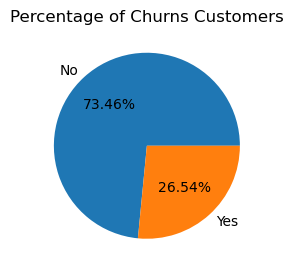

In [11]:
plt.figure(figsize=(3,4))
gb=df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb['Churn'],labels=gb.index,autopct="%1.2f%%")
plt.title("Percentage of Churns Customers")
plt.show()


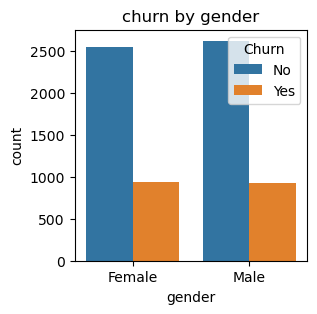

In [12]:
plt.figure(figsize=(3,3))
sns.countplot(x="gender",data=df,hue="Churn")
plt.title("churn by gender")
plt.show()

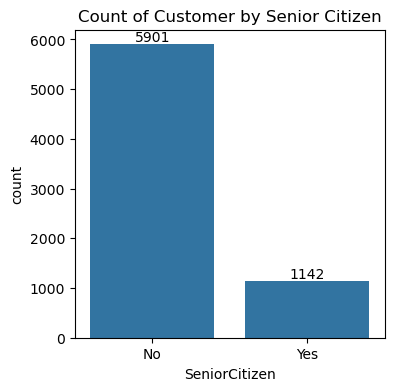

In [13]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="SeniorCitizen",data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Senior Citizen")
plt.show() 

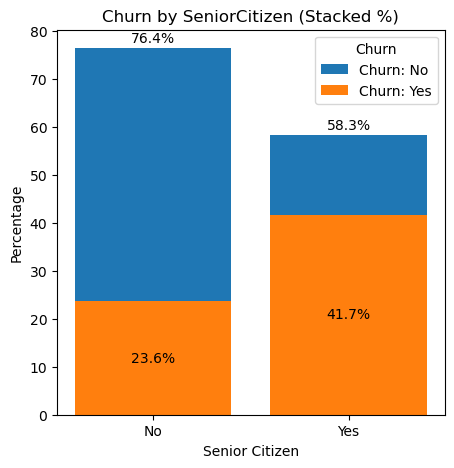

In [14]:
count_data = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='count')

# Calculate the percentage for each group
total_counts = df['SeniorCitizen'].value_counts().reset_index()
total_counts.columns = ['SeniorCitizen', 'total']

merged_data = count_data.merge(total_counts, on='SeniorCitizen')
merged_data['percentage'] = (merged_data['count'] / merged_data['total']) * 100

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(5, 5))
sns.set_palette("Set2")

# Create bars for each Churn group
for churn_value in merged_data['Churn'].unique():
    subset = merged_data[merged_data['Churn'] == churn_value]
    ax.bar(subset['SeniorCitizen'], subset['percentage'], label=f'Churn: {churn_value}')

# Adding percentage labels
for index, row in merged_data.iterrows():
    ax.text(
        row['SeniorCitizen'], 
        row['percentage'] / 2 if row['Churn'] == 'Yes' else row['percentage'] + 2,  # Adjust position
        f"{row['percentage']:.1f}%", 
        ha='center', 
        va='center'
    )

# Plot customization
plt.title("Churn by SeniorCitizen (Stacked %)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.legend(title="Churn")
plt.show()

#comparative a greater pecentage of people in senior citizen category have churned

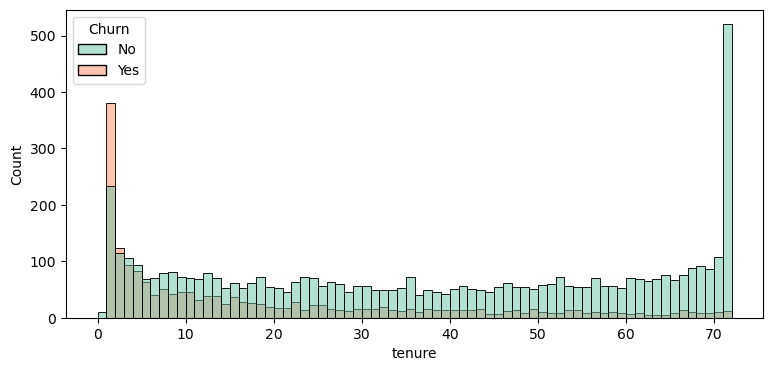

In [15]:
plt.figure(figsize=(9,4))
sns.histplot(x='tenure',data=df,bins=72,hue='Churn')
plt.show()

#people who have used our service for long time have stayed and people who have used our services 1or 2 months have churned

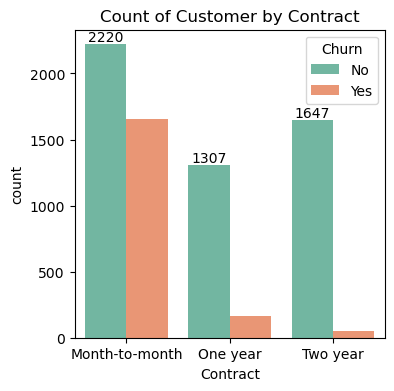

In [16]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Contract")
plt.show() 

#people who have month to month contract are likely to churn when from those who have 1 or 2 years contract

In [17]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

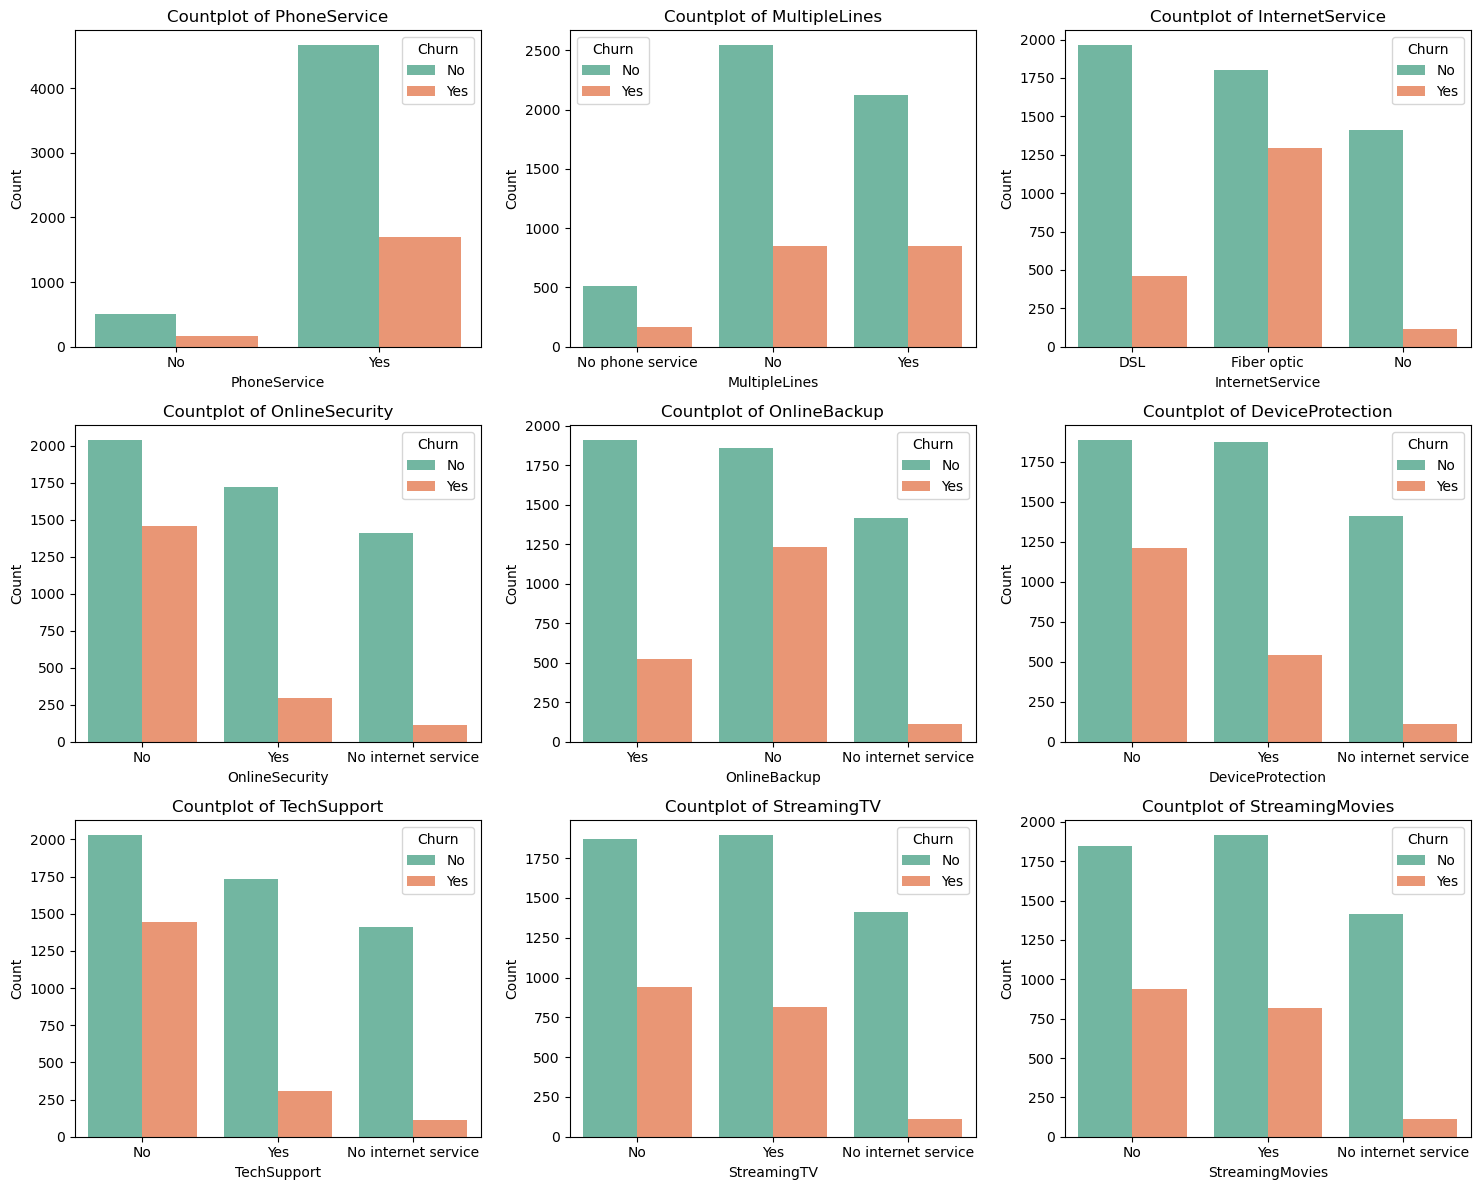

In [20]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the figure and axes for the subplots
n_cols=3
n_rows=(len(columns)+n_cols-1)//n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
axes = axes.flatten()  # Flatten the 2D axes array to 1D for easier iteration

# Loop through the columns and create countplots
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i],hue=df["Churn"])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])
# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

#In most categories, customers who churned (orange bars) are fewer compared to those who did not (green bars). Notably, churn rates seem higher among customers who lack additional services like Online Security, Tech Support, and Device Protection. Internet Service type also plays a role, with Fiber optic users showing a higher tendency to churn compared to DSL users.

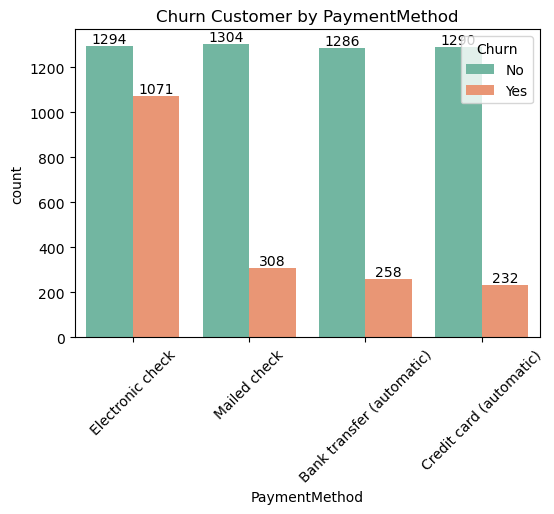

In [24]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x="PaymentMethod",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn Customer by PaymentMethod")
plt.xticks(rotation=45)
plt.show()

#customer is likely to churn when he is using electronic check as a payment method